In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Exploratory Data Analysis & Visualization

## Load Dataset

In [7]:
df = pd.read_csv('/content/Pharma_Industry.csv')
print("Dataset loaded successfully. First 5 rows:")
df.head()

Dataset loaded successfully. First 5 rows:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


## Initial Data Inspection

In [8]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


## Visualize Data

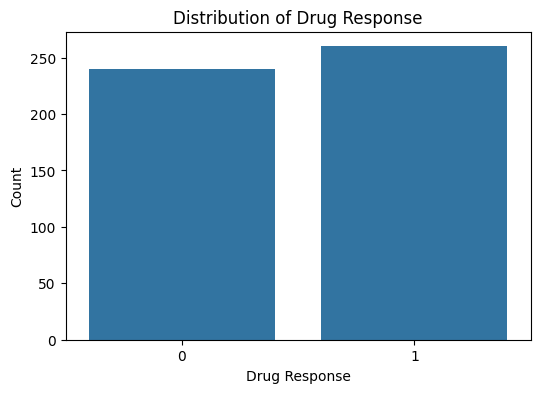

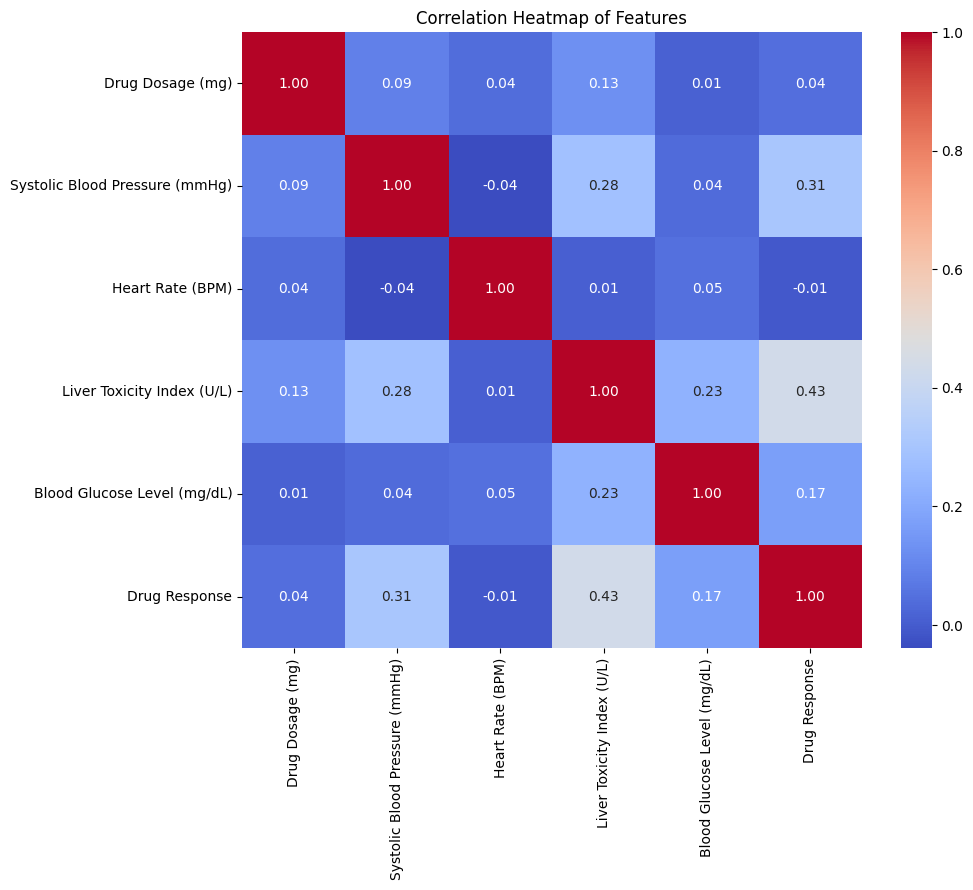

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Drug Response', data=df)
plt.title('Distribution of Drug Response')
plt.xlabel('Drug Response')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

## Data Preprocessing

In [11]:
# Define Features (X) and Target (y)
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (Scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## SVM Implementation & Results

In [12]:
# Task 4: Initialize and Train SVM with a basic Linear Kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Task 5: Evaluate Performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.78

Confusion Matrix:
 [[36  8]
 [14 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



## Parameter Tuning (Optimization)

In [13]:
# Experimenting with RBF kernel (curved boundary) and different C values
optimized_model = SVC(kernel='rbf', C=1.0, gamma='scale')
optimized_model.fit(X_train, y_train)

opt_pred = optimized_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, opt_pred))

Optimized Accuracy: 0.84
